## Task #2 To Explore Supervised Machine Learning
 * To predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

In [89]:
# Importing necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
%matplotlib inline

In [3]:
# Importing the dataset in the form of dataframe object
df = pd.read_csv("http://bit.ly/w-data")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [52]:
# Checking statistical values 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.shape

(25, 2)

## Performing EDA

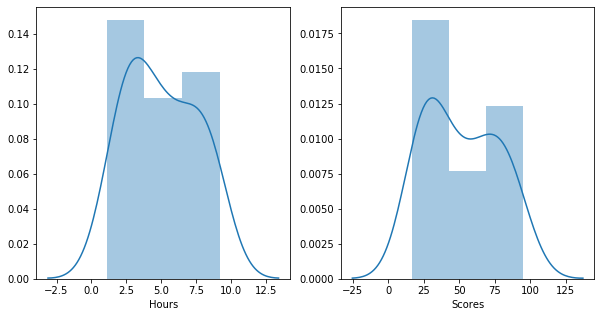

In [57]:
# Distribution of both the features
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
sns.distplot(df["Hours"], ax=ax1);
sns.distplot(df["Scores"], ax=ax2);

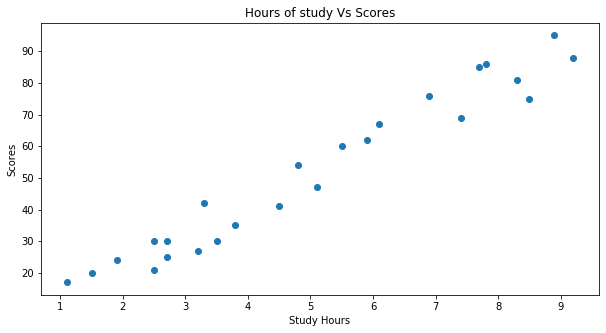

In [63]:
# Scatter plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df["Hours"], df["Scores"]);
ax.set(title="Hours of study Vs Scores", xlabel="Study Hours", ylabel="Scores");

On oberserving the data set it is clear that we have to implement **Linear Regression** to predict the expected score a student can get, given the Hrs. of study of that student.

## Linear Regression with One variable

`Linear Regression is used to find a realtionship between one or more feature(independent variables) and a continous target variable (dependent variable).`


**Mathematics behind Linear Regression :**


The Objective of linear regression is to minimize the **cost function**,
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m}(h_\theta(x ^{(i)})-y^{(i)})^2$$

where $ h_\theta(x^{(i)}) $ is the hypothesis equation given by,
$$ h_\theta(x^{(i)}) = \theta_0 + \theta_1 . x = \theta ^ {T} . x$$

Parameters for our model are gonna be $\theta_j $, these are the values that we will adjust in order to minimise the cost function $ J(\theta)$. One way for doing this is by using Gradient Descent algorithm also known as Batch Gradient Descent algorithm.

Gradient Descent in each iteration performs

$$ \theta_j :=  \theta_j - \alpha \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)})-y^{(i)}) . x^{(i)}_j $$

which updates all $\theta_j$ simultaneously $\forall  j $

With each step of the gradient descent, your parameter comes closer to the optimal value of $\theta$ to minimise $J(\theta)$. 

Now all these things can be performed using LinearRegression class of sklearn.

In [48]:
# Saparating out independent and dependant variables
X = df["Hours"].values.reshape(-1, 1)
y = df["Scores"].values.reshape(-1, 1)

In [49]:
# Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Initializing and training the model

In [50]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

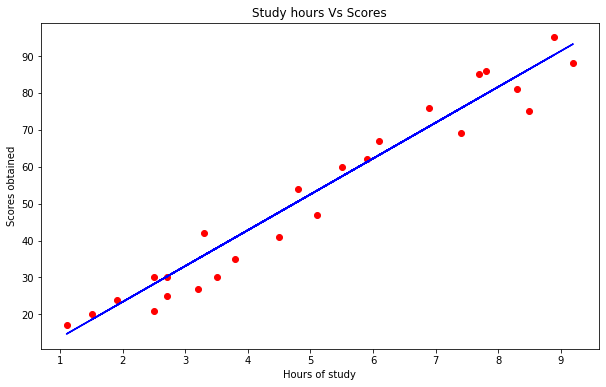

In [91]:
# Regression line generated by the predicted values
fig, ax = plt.subplots(figsize=(10, 6))

plt.scatter(X, y, color='r')
plt.title("Study hours Vs Scores")
plt.xlabel("Hours of study");
plt.ylabel("Scores obtained");

plt.plot(X, regressor.predict(X), color='b');

In [90]:
# Calculating errors on test dataset
print("Mean Squared Error: ", mean_squared_error(y_test, preds))
print("Mean Absolute Error: ", mean_absolute_error(y_test, preds))

Mean Squared Error:  62.71190102721748
Mean Absolute Error:  7.602345426761218


## Predicting the Scores if one studies for 9.5hrs

In [96]:
print("Predicted Score if one studies for 9.5hrs : ", float(regressor.predict([[9.5]]).flatten()))

Predicted Score if one studies for 9.5hrs :  96.15204065864253
